## Machine Learning -Module 07 - 2/25/2025


- Author: [Nathan Sloss](https://github.com/nwn8)
- Repository: [datafun-06-eda](https://github.com/nwn8/datafun-07-ml)

## Part 1 - Chart a Straight Line

In [513]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [514]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
temps_df.head(10)


,Fahrenheit,Celsius
0,0,-17.78
1,10,-12.22
2,20,-6.67
3,30,-1.11
4,40,4.44
5,50,10.00
6,60,15.56
7,70,21.11
8,80,26.67
9,90,32.22


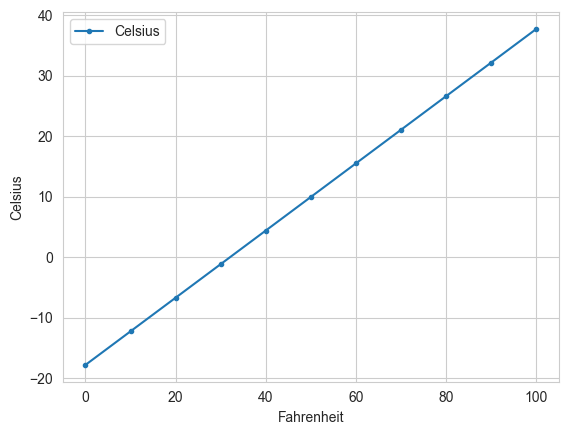

In [515]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

## 2. Part 2 - Prediction

### Section 1 - Data Acquisition

In [516]:
nyc_df= pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')


### Section 2 - Data Inspection

In [517]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [518]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [519]:
nyc_df2=nyc_df[['Date', 'Value']].copy()
nyc_df2.columns= ['Date', 'Temperature']
nyc_df2.Date=nyc_df2.Date.floordiv(100)
nyc_df2.head()

,Date,Temperature
0,1895,34.2
1,1896,34.7
2,1897,35.5
3,1898,39.6
4,1899,36.4


### Section 4 - Descriptive Statistics

In [520]:
pd.set_option('display.precision', 2)

In [521]:
nyc_df2.describe()

,Date,Temperature
count,124.00,124.00
mean,1956.50,37.60
std,35.94,4.54
min,1895.00,26.10
25%,1925.75,34.58
50%,1956.50,37.60
75%,1987.25,40.60
max,2018.00,47.60


### Section 5 - Build the Model

In [522]:
linear_regression = stats.linregress(x=nyc_df2.Date,
                                     y=nyc_df2.Temperature)

In [523]:
linear_regression.slope

np.float64(0.014771361132966163)

In [524]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict

The data only runs through 2018.  To predict the average high temperature in January 2024 use the equation temperature = slope * year + intercept

In [525]:
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

### Section 7 - Visualizations

In [526]:
sns.set_style('whitegrid')

(10.0, 70.0)

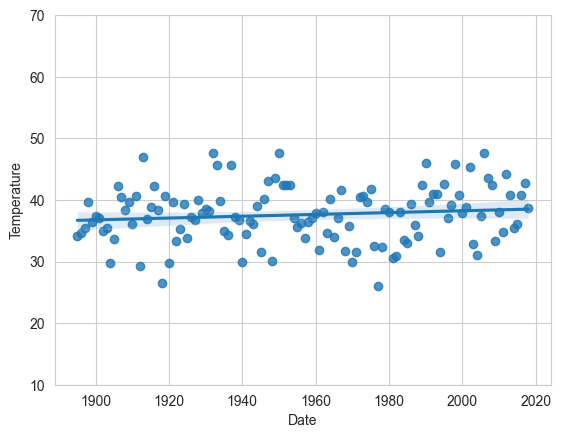

In [527]:
axes = sns.regplot(x=nyc_df2.Date, y=nyc_df2.Temperature)

axes.set_ylim(10, 70)

## Part 3 - Prediction

### Section 1 - Build the Model

In [528]:
X_train, X_test, y_train, y_test = train_test_split(
     nyc_df2.Date.values.reshape(-1, 1), nyc_df2.Temperature.values, 
     random_state=11)

In [529]:
X_train.shape

(93, 1)

In [530]:
X_test.shape

(31, 1)

In [531]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [532]:
linear_regression.coef_

array([0.01939167])

In [533]:
linear_regression.intercept_

np.float64(-0.30779820252656975)

### Section 2 - Test the Model

In [534]:
predicted = linear_regression.predict(X_test)

In [535]:
expected = y_test

In [536]:
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

In [537]:
predict = (lambda x: linear_regression.coef_ * x + 
                      linear_regression.intercept_)

In [538]:
predict(2024)

array([38.94094855])

### Section 4 - Visualizations

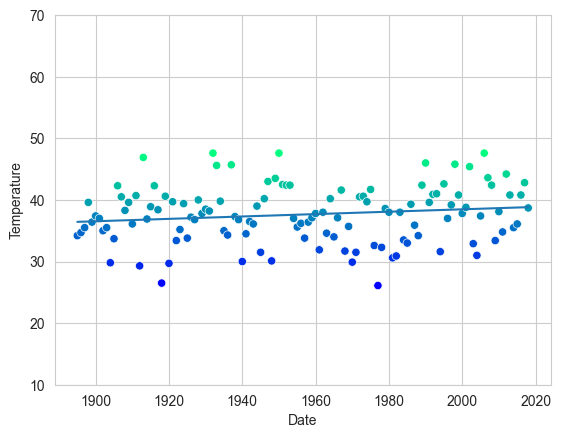

In [539]:
axes = sns.scatterplot(data=nyc_df2, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

import numpy as np

x = np.array([min(nyc_df2.Date.values), max(nyc_df2.Date.values)])

y = predict(x)

import matplotlib.pyplot as plt 

line = plt.plot(x, y)

## Part 4 - Insights

Comparing the two methods to predict temperature data based on previous data. 

The first simpler linear regression model predicted a January 2024 temperature of 38.59 while the Machine learning regression model predicted a temperature of 38.94.  Considering how close both predictions are together, there is hardly any need to really analyze them further with the exception of ease of use of each method to get to the temperatures.   I have no preference on which model to use.